# Initialization(Application)

在这里我们将看看不同的初始化对神经网络带来的不同效果.

In [1]:
import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

### Load Data

加载sklearn中的make circles数据集.

In [2]:
def load_data():
    np.random.seed(1)
    # x.shape == (n_samples, 2),Y.shape = n_samples
    train_X,train_y = sklearn.datasets.make_circles(n_samples=300,noise=.05) 
    np.random.seed(2)
    test_x,test_y = sklearn.datasets.make_circles(n_samples=100,noise=.05)
    # plot train_x
    plt.scatter(train_X[:,0],train_X[:,1],c = train_y)
    plt.show()
    train_X = train_X # two features,need transpose
    train_Y = train_y.reshape(-1,1)
    
    test_X = test_x
    test_Y = test_y.reshape(-1,1)
    
    return train_X,train_Y,test_X,test_Y

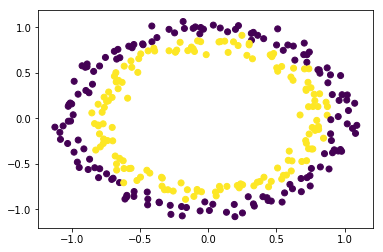

In [3]:
train_x,train_y,test_x,test_y = load_data()

### Create Initialization of Python Class

创建一个Initialization类,其中包括不同的初始化方法.

初始化方法包括:

(1) **Zeros:**即将所有的hidden layers的权重$Weights$初始化为0.

(2) **Random:**即将所有的hidden layers的$Weights$初始化为一个服从标准正态分布的随机数.

(3) **He**:即将所有的hidden layers的$Weights$初始化为一个HE.HE=$\sqrt{\frac{2}{input\;units}}$

(4) **Xavier:**即将所有的hidden layers的$Weights$初始化为一个Xavier.Xavier=$\sqrt{\frac{2}{input\;units+output\;units}}$或者$\sqrt{\frac{6}{input\;units+output\;units}}$

**函数对照表:**

[1]

```python
def __init__(self,init_mode,layers,lr,epochs,print_step):
    ...```
    
该函数主要用来初始化class,其中```init_mode```表示选择初始化的模式,可以选择1.Zeros,2.Random,3.HE,4.Xavier

[2]

```python
def init_parameters(self):
    ...```

依照```init_mode```选择不同的初始化方式.将结果$W,b$以字典的方式存入```parameters```.


[3] Other Function

```python
def forward(self,X,parameters):
    ...```
    
实现Forward Propagation.并将$Z^{[l]},A^{[l]}$缓存用于Backward Propagation.

[4]

```python
def backward(self,A,y,cache,parameters):
    ...```
    
实现反向传播,将更新参数$dW,db$存入```dparameters```,用于Updating.


[5]

```python
def update(self,dparameters,parameters):
    ...```
    
依照```dparameters```和```parameters```更新参数,记得要确保$dW^{[l]}.dim=W^{[l]}.dim,db^{[l]}.dim=b^{[l]}.dim$

[6]

```python
def fit(self,data,labels,val_data,val_labels):
    ...```
    
Fitting Model.每隔参数```self.print_step```打印一次信息.

[7]

```python
def score(self,X,y,parameters,is_loss=False):
    ...```
    
计算正确率,如果```is_loss=True```则还将计算当前数据的loss.

[8]

```python
def plot_decision_boundary(self,X,Y,parameters,initial_name):
    ...```
    
绘制决策边界,将该图内的所有网格组合层一组数据,数据的第一个特征为X轴,第二个特征为Y轴.然后将这些数据进行预测并填色.

In [12]:
class Initialization:
    """
    Create Initialization of Python class
    """
    def __init__(self,init_mode,layers,lr,epochs,print_step):
        """
        init this class
        Parameters:
        ----------
            init_mode: initialization parameters model,can choose:1.Zeros,2.Random,3.He,4.Xavier.
            layers: hidden layers, and plus input layer units.
            lr: learning rate.
            epochs: #Iterate.
            print_step: print information of step.
        """
        self.init_mode = init_mode
        self.layers = layers
        self.lr = lr
        self.epochs = epochs
        self.print_step = print_step
        
    def init_parameters(self):
        """
        initialization hidden layers's parameters.
        Note:
        ----
            different ini_mode have different result.
            Xavier have two methods,I choose sqrt(6/(inputs+outputs.))
            
        Return:
        ------
            parameters: include weights and bias.
        """
        np.random.seed(12)
        parameters = {}
        for l in range(self.L-1):
            
            if self.init_mode == "Zeros":
                parameters['W'+str(l+1)] = np.zeros((self.layers[l],self.layers[l+1]))
                parameters['b'+str(l+1)] = np.zeros((1,self.layers[l+1]))
            elif self.init_mode == "Random":
                parameters['W'+str(l+1)] = np.random.randn(self.layers[l],self.layers[l+1])
                parameters['b'+str(l+1)] = np.zeros((1,self.layers[l+1]))
            elif self.init_mode == "He":
                parameters['W'+str(l+1)] = np.random.randn(self.layers[l],
                                                            self.layers[l+1]) / np.sqrt(2/self.layers[l])
                parameters['b'+str(l+1)] = np.zeros((1,self.layers[l+1]))
            elif self.init_mode == "Xavier":
                parameters['W'+str(l+1)] = np.random.randn(self.layers[l],
                                                           self.layers[l+1]) / np.sqrt(6/(self.layers[l]
                                                                                           +self.layers[l+1]))
                parameters['b'+str(l+1)] = np.zeros((1,self.layers[l+1]))
            else:
                print('Invalid init mode {}'.format(self.init_mode))
                
        return parameters
        
    def relu(self,Z):
        """
        activation func, Relu.
        """
        return np.maximum(0,Z)
    
    def sigmoid(self,Z):
        """
        activation func,sigmoid.
        """
        return 1./(1.+np.exp(-Z))
    
    def cost(self,A,y):
        """
        cost function
        caculate binary crosseEntropy.
        Return:
        ------
            loss: loss value of current step.
        """
        m = y.shape[0]
        loss = -np.sum(np.multiply(y,np.log(A))+np.multiply((1-y),np.log(1-A))) /m
        
        return loss
    
    def forward(self,X,parameters):
        """
        Forward propagation.
        Parameters:
        ----------
            X:data set.
            parameters: include weights and bias.
        Returns:
        -------
            A: output layer value,using sigmoid activation.
            cache: include A and Z,to caculate dW,dZ in backward propagation.
        """
        A = X
        cache = {'A0':A}
        
        for l in range(self.L-1):
            W = parameters['W'+str(l+1)]
            b = parameters['b'+str(l+1)]
            Z = np.add(np.dot(A,W),b)
            cache['Z'+str(l+1)] = Z
            if l == self.L-2:
                A = self.sigmoid(Z)
            else:
                A = self.relu(Z)
            cache['A'+str(l+1)] = A
        
        return A,cache
    
    def backward(self,A,y,cache,parameters):
        """
        backward propagation
        Parameters:
        ----------
            A: output layer valus.
            y: true labels.
            cache: include A and Z.
            parameters: include weights and bias.
        Returns:
        -------
            dparameters: include dW,db to updating in update function.
        """
        m = y.shape[0]
        
        dparameters = {}
        
        for l in range(self.L-1,0,-1):
            if l == self.L -1:
                dZ = A - y
            else:
                Z = cache['Z'+str(l)]
                dZ = np.multiply(dA,np.int64(Z>0))
                
            A = cache['A'+str(l-1)]    
            dW = np.dot(A.T,dZ) / m
            db = np.sum(dZ,axis=0,keepdims=True) /m
            dparameters['dW'+str(l)] = dW
            dparameters['db'+str(l)] = db
            W = parameters['W'+str(l)]
            if l != 1:
                dA = np.dot(dZ,W.T)   
                
                
        return dparameters
    
    def update(self,dparameters,parameters):
        """
        Updating parameters.
        Parameters:
        ----------
            dparameters:include dW,db.
            parameters: include W,b.
        Return:
        ------
            parameters:updated Weights and bias.
        """
        for l in range(self.L-1):
            parameters['W'+str(l+1)] = parameters['W'+str(l+1)] - self.lr * dparameters['dW'+str(l+1)]
            parameters['b'+str(l+1)] = parameters['b'+str(l+1)] - self.lr * dparameters['db'+str(l+1)]
        
        return parameters
        
    
    def fit(self,data,labels,val_data,val_labels):
        """
        Fitting model.
        Parameters:
        ----------
            data: training data.
            labels: training labels.
            val_data: validation data set.
            val_labels: validation labels.
        """
        m,n = data.shape
        self.layers.insert(0,n)
        self.L = len(layers)
        # initialization parameters.
        parameters = self.init_parameters()
        
        # start training model.
        for epoch in range(self.epochs):
            # forward propagation
            A,cache = self.forward(X=data,parameters=parameters)
            # caculate loss
            loss = self.cost(A,labels)
            # backward propagation.
            dparameters = self.backward(A=A,y=labels,cache=cache,parameters=parameters)
            # updating parameters.
            parameters = self.update(dparameters,parameters)
            # print informations.
            if epoch % self.print_step == 0:
                # caculate score with train and validation.
                train_acc = self.score(data,labels,parameters)
                val_acc,val_loss = self.score(val_data,val_labels,parameters,True)
                print('[{}/{}] loss:{},train acc{},val loss:{},val acc:{}'.format(epoch + self.print_step,
                                                                                  self.epochs,
                                                                                 loss,
                                                                                 train_acc,
                                                                                 val_loss,
                                                                                 val_acc))
        self.plot_decision_boundary(data,labels,parameters,self.init_mode)
                
    
    def score(self,X,y,parameters,is_loss=False):
        """
        score in the current model.
        Parameters:
        ----------
            X: score data.
            y: true labels in score data set.
            parameters: current best weights and bias.
            is_loss: caculate loss if is_loss=True,default False.
        Returns:
        -------
            acc: score data correct rate.
            loss: score data loss value, if caculate it!
        """
        m = y.shape[0]
        A,_ = self.forward(X=X,parameters=parameters)
        predict = np.round(A)
        acc = np.equal(predict,y).sum() / m
        
        if is_loss:
            loss = self.cost(A,y)
            return acc,loss
        else:
            return acc

    def plot_decision_boundary(self,X,Y,parameters,initial_name):
        """
        Plot decision bounary.
        """
         # Set min and max values and give it some padding
        x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
        y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
        # 等差数列
        x = np.arange(x_min,x_max,0.01)
        y = np.arange(y_min,y_max,0.01)
        # 从坐标向量返回坐标矩阵，也就是绘制网格的点的坐标
        xx,yy = np.meshgrid(x,y)
        # 沿结果的第二轴进行连接
        X_ = np.c_[xx.ravel(),yy.ravel()]


        A,_ = self.forward(X=X_,parameters=parameters)
        y_hat = np.round(A)

        fig = plt.figure()
        plt.subplot(1,1,1)
        plt.title('model with {} initialization'.format(initial_name))
        plt.scatter(X_[:,0], X_[:,1], c=np.squeeze(y_hat))
        plt.scatter(X[:,0], X[:,1], c=np.squeeze(Y), cmap=plt.cm.Spectral,linewidths=1)

#### Initialization of Zeros

首先我们先尝试使用"Zeros"去初始化,我们知道在神经网络中是禁止使用$Weights=0$的方式,因为如果采用这种方式,实际上所有的hidden layer都做的是一个简单的线性操作.也就相当于只有一层hidden layer.

举个简单的例子:

$Z_1 = W_1X+b_1$

$A_1 = Relu(Z_1)$

$Z_2 = W_2A_1+b_2$

$A_2 = Relu(Z_2)$

可以看出如果$W=0$,那么整个网络结构没有意义.

[1500/15000] loss:0.6931471805599453,train acc0.5,val loss:0.6931471805599453,val acc:0.5
[3000/15000] loss:0.6931471805599453,train acc0.5,val loss:0.6931471805599453,val acc:0.5
[4500/15000] loss:0.6931471805599453,train acc0.5,val loss:0.6931471805599453,val acc:0.5
[6000/15000] loss:0.6931471805599453,train acc0.5,val loss:0.6931471805599453,val acc:0.5
[7500/15000] loss:0.6931471805599453,train acc0.5,val loss:0.6931471805599453,val acc:0.5
[9000/15000] loss:0.6931471805599453,train acc0.5,val loss:0.6931471805599453,val acc:0.5
[10500/15000] loss:0.6931471805599453,train acc0.5,val loss:0.6931471805599453,val acc:0.5
[12000/15000] loss:0.6931471805599453,train acc0.5,val loss:0.6931471805599453,val acc:0.5
[13500/15000] loss:0.6931471805599453,train acc0.5,val loss:0.6931471805599453,val acc:0.5
[15000/15000] loss:0.6931471805599453,train acc0.5,val loss:0.6931471805599453,val acc:0.5


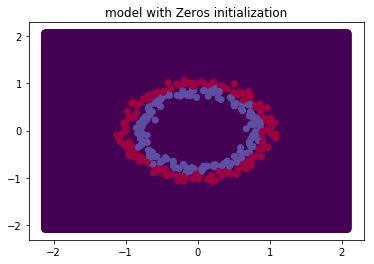

In [5]:
layers = [10,5,1]
model_zeros = Initialization(init_mode='Zeros',layers=layers,lr=0.009,epochs=15000,print_step=1500)
model_zeros.fit(data=train_x,labels=train_y,val_data=test_x,val_labels=test_y)

可以看到结果是毫无效果的.

#### Initialization of Random

下面采用服从标准正态分布的随机数初始化,这样会使得整个网络具有"意义".

In [6]:
layers = [10,5,1]
model_random = Initialization(init_mode='Random',layers=layers,lr=0.009,epochs=15000,print_step=1500)

[1500/15000] loss:1.4236709548541242,train acc0.5,val loss:1.3875589791454117,val acc:0.52
[3000/15000] loss:0.6854382296186272,train acc0.5066666666666667,val loss:0.6865515265496265,val acc:0.53
[4500/15000] loss:0.6814803761815403,train acc0.5233333333333333,val loss:0.6823434899801889,val acc:0.53
[6000/15000] loss:0.6765549363007205,train acc0.5433333333333333,val loss:0.6772931581491325,val acc:0.54
[7500/15000] loss:0.6695712490547207,train acc0.56,val loss:0.6714264562173698,val acc:0.56
[9000/15000] loss:0.6601855330516572,train acc0.56,val loss:0.6633837811593913,val acc:0.57
[10500/15000] loss:0.6473413767806907,train acc0.5833333333333334,val loss:0.6529410684193623,val acc:0.58
[12000/15000] loss:0.6315469799135514,train acc0.6033333333333334,val loss:0.6390463536954242,val acc:0.61
[13500/15000] loss:0.6029543232119274,train acc0.6433333333333333,val loss:0.615240409052139,val acc:0.64
[15000/15000] loss:0.4569076671262828,train acc0.85,val loss:0.4609027978469104,val acc

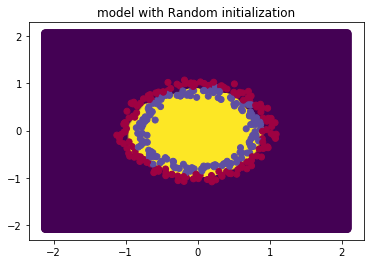

In [7]:
model_random.fit(data=train_x,labels=train_y,val_data=test_x,val_labels=test_y)

#### Initialization of He

使用He的方式进行初始化,像He,或者Xavier都是比较好的初始化方式,两者能使得每一个$W$都处于一个范围内.

[1500/15000] loss:4.178656434724107,train acc0.5,val loss:3.9205072106816896,val acc:0.51
[3000/15000] loss:0.661321452286554,train acc0.5466666666666666,val loss:0.6727473760740597,val acc:0.56
[4500/15000] loss:0.6489820641817055,train acc0.57,val loss:0.6637359182776323,val acc:0.56
[6000/15000] loss:0.635149409080779,train acc0.58,val loss:0.6512591317179077,val acc:0.57
[7500/15000] loss:0.6218910368360769,train acc0.5966666666666667,val loss:0.638809939493553,val acc:0.57
[9000/15000] loss:0.6077518606997881,train acc0.6066666666666667,val loss:0.6278542981994858,val acc:0.59
[10500/15000] loss:0.58842276150006,train acc0.6266666666666667,val loss:0.6065186454438889,val acc:0.58
[12000/15000] loss:0.5637319248920479,train acc0.6433333333333333,val loss:0.5802267335137973,val acc:0.61
[13500/15000] loss:0.49176071737302285,train acc0.6633333333333333,val loss:0.5194002617215007,val acc:0.63
[15000/15000] loss:0.26324624040287004,train acc0.9366666666666666,val loss:0.2871909368604

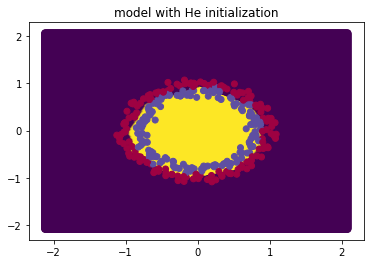

In [8]:
layers = [10,5,1]
model_He = Initialization(init_mode='He',layers=layers,lr=0.009,epochs=15000,print_step=1500)
model_He.fit(data=train_x,labels=train_y,val_data=test_x,val_labels=test_y)

#### Initialization of Xavier

[1500/15000] loss:2.7309245257735792,train acc0.5,val loss:2.6297374634876127,val acc:0.52
[3000/15000] loss:0.6758838063788687,train acc0.5466666666666666,val loss:0.6770001946340224,val acc:0.58
[4500/15000] loss:0.6589699335704967,train acc0.6166666666666667,val loss:0.6624234066660342,val acc:0.63
[6000/15000] loss:0.6308245978812373,train acc0.63,val loss:0.6364137481058361,val acc:0.61
[7500/15000] loss:0.5704288290086318,train acc0.7366666666666667,val loss:0.5804626285453787,val acc:0.72
[9000/15000] loss:0.36515198382632125,train acc0.91,val loss:0.3770967062851564,val acc:0.91
[10500/15000] loss:0.2511455499328784,train acc0.96,val loss:0.2724575136953634,val acc:0.93
[12000/15000] loss:0.1892565316696535,train acc0.9633333333333334,val loss:0.22456870931679485,val acc:0.94
[13500/15000] loss:0.1516704126825742,train acc0.9766666666666667,val loss:0.1951222186750054,val acc:0.93
[15000/15000] loss:0.12581431171696303,train acc0.9766666666666667,val loss:0.17534928091151894,va

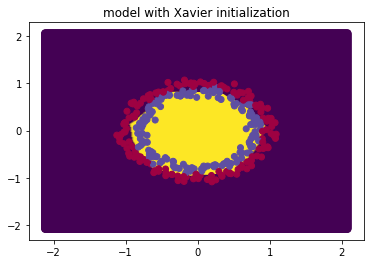

In [13]:
layers = [10,5,1]
model_Xavier = Initialization(init_mode='Xavier',layers=layers,lr=0.009,epochs=15000,print_step=1500)
model_Xavier.fit(data=train_x,labels=train_y,val_data=test_x,val_labels=test_y)

# Summary

(1) 初始值权重禁止为0,因为这样会使得整个网络无效(只做简单的线性操作)

(2) 实际上初始值不可过大,如果过大容易产生梯度爆炸,也不可过小,如果过小会发现梯度消失.

(3) 使用He与Xavier是一个比较合理的初始化方法,可以使得初始化权重不过大也不过小.